# Convolution

## Impulse

In [ ]:
import scipy

In [ ]:
### generate an impulse signal
N = 10 # length
delta = scipy.signal.unit_impulse(N)

In [ ]:
delta

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Convolution

In [ ]:
import numpy as np
import librosa

In [ ]:
### generate a sine-sweep signal
fmin = 100 # initial frequency
fmax = 1000 # final frequency
fs = 22050
dur = 5
x = librosa.chirp(fmin=fmin, fmax=fmax, sr=fs, duration=dur)

In [ ]:
from IPython.display import Audio

Audio(data=x, rate=fs)

In [ ]:
### convolve audio signal with impulse
y = np.convolve(x, delta)

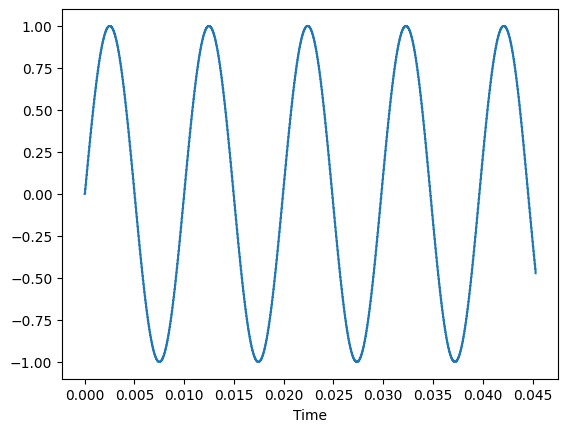

In [ ]:
librosa.display.waveshow(x[:1000], sr=fs)

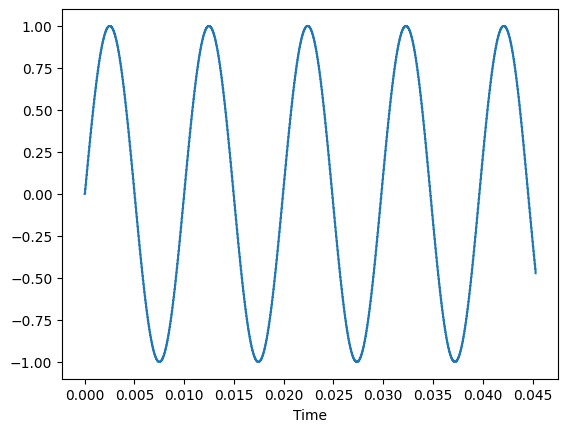

In [ ]:
librosa.display.waveshow(y[:1000], sr=fs)

# FIR Filters

## Ideal Low Pass Filter

In [ ]:
### compute filter coefficients
N = len(x) # length
H = np.ones(1 + N//2, dtype=complex) # initialize frequency response with ones

freqs = np.fft.rfftfreq(N, d=1/fs) # positive analysis frequencies
fc = 500 # cutoff frequency
H[freqs > fc] = 0 # set frequencies above cutoff to zeros
h = np.fft.irfft(H) # time domain coefficients

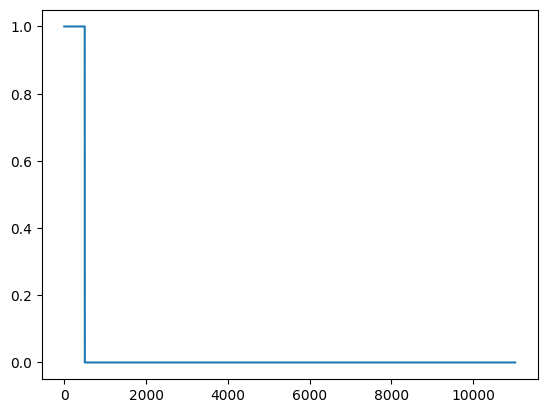

In [ ]:
import matplotlib.pyplot as plt

### plot frequency response
plt.plot(freqs, np.abs(H))

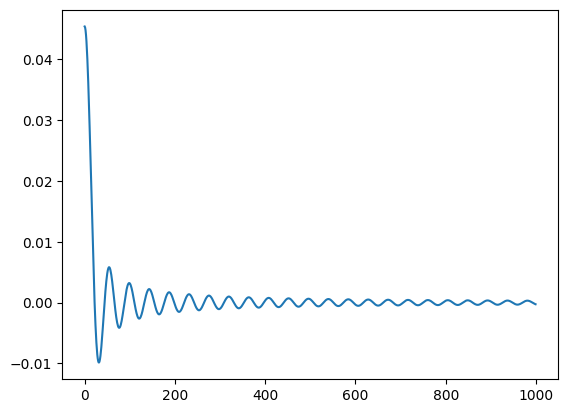

In [ ]:
### plot impulse response
plt.plot(h[:1000])

In [ ]:
### compute the convolution
X = np.fft.rfft(x)
Y = H*X
y = np.fft.irfft(Y)

In [ ]:
Audio(data=y, rate=fs)

## The Window Method

In [ ]:
### build filter using the window method
order = 2 * fs // fc # filter order
hw = scipy.signal.firwin(order, fc, window='hann', fs=fs)

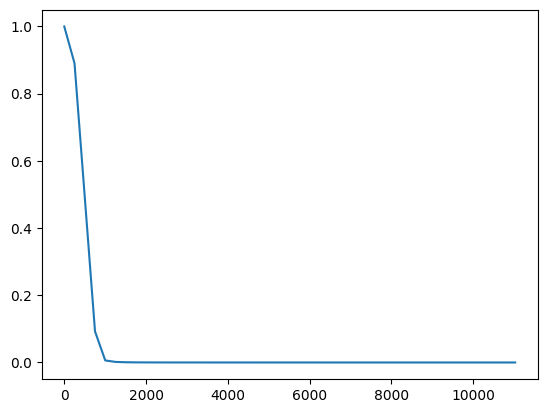

In [ ]:
### plot frequency response
freqs = np.fft.rfftfreq(order, d=1/fs)
Hw = np.fft.rfft(hw)
plt.plot(freqs, np.abs(Hw))

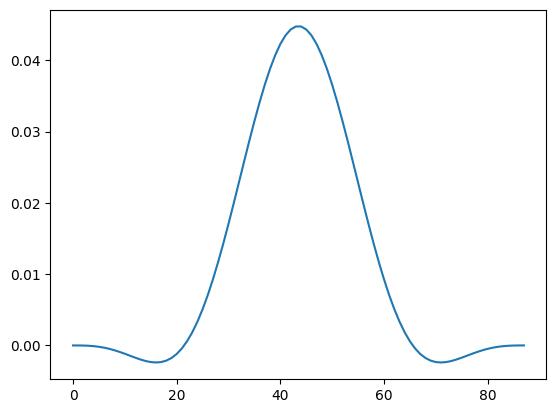

In [ ]:
### plot impulse response
plt.plot(hw)

In [ ]:
y = scipy.signal.convolve(hw, x)
Audio(data=y, rate=fs)

## Phase And Group Delay

In [ ]:
### generate the impulse response of a delay
N = 32
d = 5

h = scipy.signal.unit_impulse(N, d)

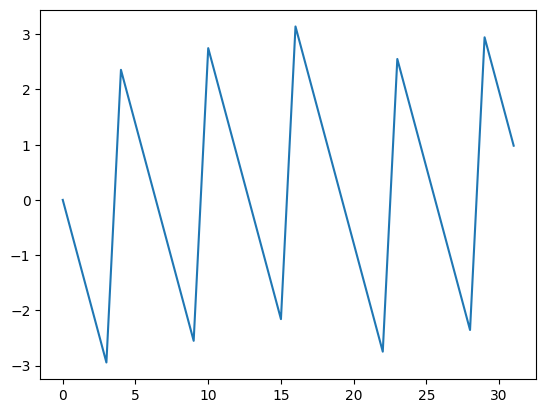

In [ ]:
### plot phase spectrum
H = np.fft.fft(h)
phase = np.angle(H)

plt.plot(phase)

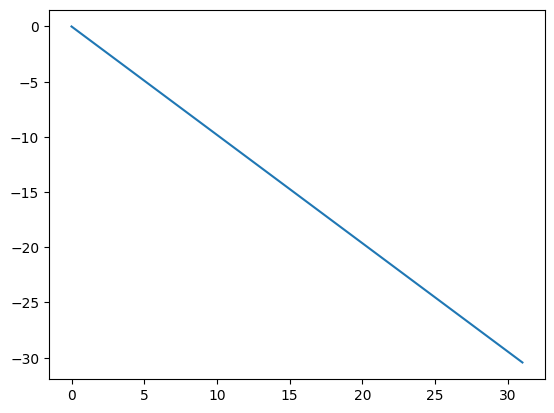

In [ ]:
### plot unwrapped phase spectrum
phase_unwrap = np.unwrap(phase)

plt.plot(phase_unwrap)

In [ ]:
### compute group delay
freqs = np.fft.fftfreq(N, 1/fs)
_, gd_samples = scipy.signal.group_delay((h, 1), w=freqs, fs=fs)
gd = gd_samples / fs

In [ ]:
gd

array([0.00022676, 0.00022676, 0.00022676, 0.00022676, 0.00022676,
       0.00022676, 0.00022676, 0.00022676, 0.00022676, 0.00022676,
       0.00022676, 0.00022676, 0.00022676, 0.00022676, 0.00022676,
       0.00022676, 0.00022676, 0.00022676, 0.00022676, 0.00022676,
       0.00022676, 0.00022676, 0.00022676, 0.00022676, 0.00022676,
       0.00022676, 0.00022676, 0.00022676, 0.00022676, 0.00022676,
       0.00022676, 0.00022676])

# IIR Filters

## Elliptic Filter

In [ ]:
### generate filter coefficients
fstop = 600 # end transition band at 600 Hz
attenuation = 40  # 40 dB stop band attenuation
ripple = 3  # 3 dB pass band ripple

order, wn = scipy.signal.ellipord(fc, fstop, ripple, attenuation, fs=fs)
b, a = scipy.signal.ellip(order, ripple, attenuation, wn, fs=fs)

In [ ]:
### apply filter
y = scipy.signal.filtfilt(b, a, x)

Audio(data=y, rate=fs)

## Transfer Function

In [ ]:
### compute transfer functions
freq, H = scipy.signal.freqz(b, a, fs=fs)

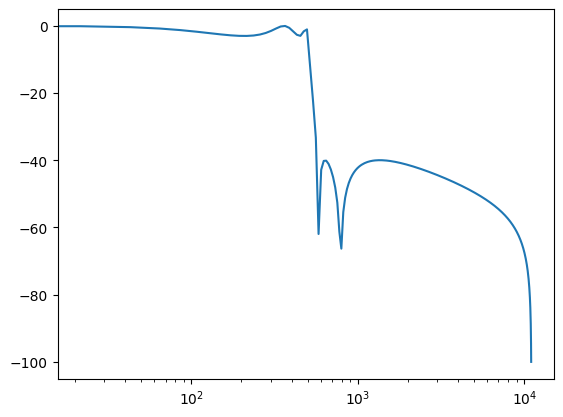

In [ ]:
### plot frequency response
H_dB = 20 * np.log10(np.abs(H) + 1e-6) # convert to dB
plt.semilogx(freq, H_dB)

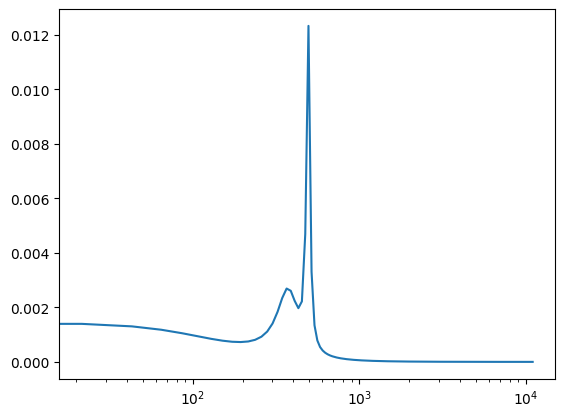

In [ ]:
### plot group delay
freq, gd_samples = scipy.signal.group_delay([b, a], fs=fs)
gd = gd_samples / fs
plt.semilogx(freq, gd)

## Poles And Zeros

In [ ]:
### compute zeros and poles
zeros, poles, _ = scipy.signal.tf2zpk(b, a)

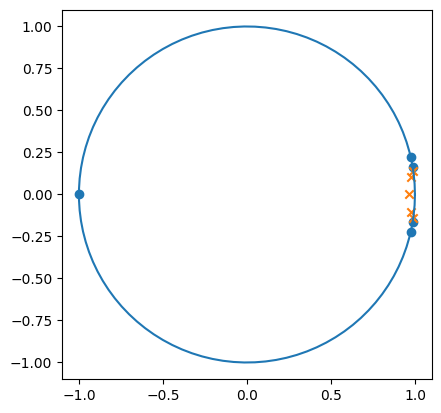

In [ ]:
### plot poles and zeros

theta = np.linspace(0, 2*np.pi, 100)
e_j = np.exp(1j*theta)
plt.plot(np.real(e_j), np.imag(e_j)) # plot unit circle

plt.scatter(np.real(zeros), np.imag(zeros), marker='o') # plot zeros
plt.scatter(np.real(poles), np.imag(poles), marker='x') # plot poles

plt.gca().set_aspect('equal')